In [1]:
import torch
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.append(r'/user/gr1/delphi/dghezzi/UNet')

from AttentionUnet import UNetWithAttention, inference_image, inference_dataset, img_kp_pred_and_gr, load_keypoints_from_csv

device = 'cuda' if torch.cuda.is_available() else 'cpu'


[INFO] Calcolo con binary_threshold=0.800 ...

[INFO] Calcolo con binary_threshold=0.805 ...

[INFO] Calcolo con binary_threshold=0.810 ...

[INFO] Calcolo con binary_threshold=0.815 ...

[INFO] Calcolo con binary_threshold=0.820 ...

[INFO] Calcolo con binary_threshold=0.825 ...

[INFO] Calcolo con binary_threshold=0.830 ...

[INFO] Calcolo con binary_threshold=0.835 ...

[INFO] Calcolo con binary_threshold=0.840 ...

[INFO] Calcolo con binary_threshold=0.845 ...

[INFO] Calcolo con binary_threshold=0.850 ...

[INFO] Calcolo con binary_threshold=0.855 ...

[INFO] Calcolo con binary_threshold=0.860 ...

[INFO] Calcolo con binary_threshold=0.865 ...

[INFO] Calcolo con binary_threshold=0.870 ...

[INFO] Calcolo con binary_threshold=0.875 ...

[INFO] Calcolo con binary_threshold=0.880 ...

[INFO] Calcolo con binary_threshold=0.885 ...

[INFO] Calcolo con binary_threshold=0.890 ...

[INFO] Calcolo con binary_threshold=0.895 ...

[INFO] Calcolo con binary_threshold=0.900 ...

[INFO] Calco

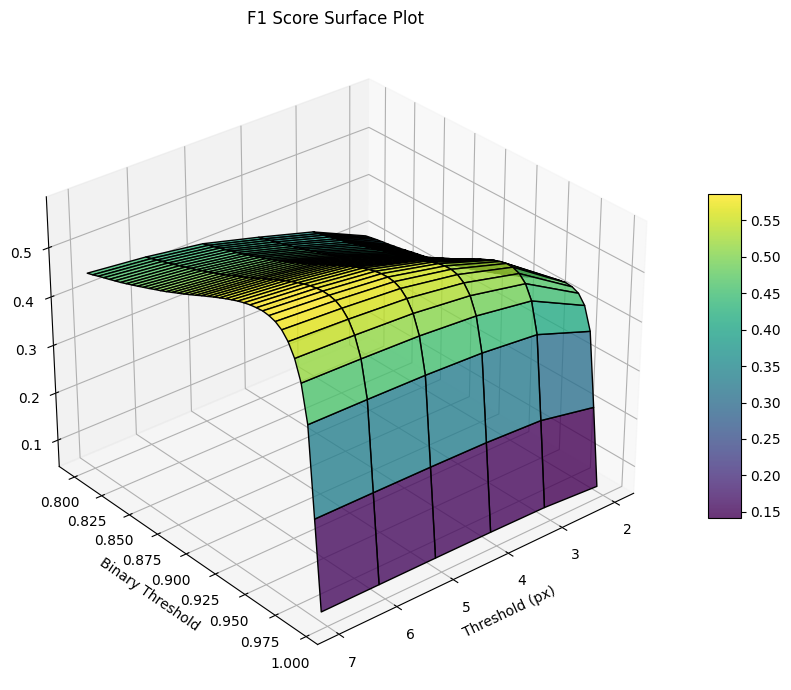

In [2]:
from AttentionUnet import inference_F1map_unet

datapath = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/416px'
output_path = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/output'
model_path = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/best_unet5.pth'

f1_matrix = inference_F1map_unet(
    dataset_path=datapath,
    model_path=model_path,
    img_size=416,
    pixel_thresholds=[2,3,4,5,6,7],
    binary_thresholds=np.arange(0.80, 1, 0.005),
    beta=1
)

In [9]:
# da f1 matrix estrapola valore max di binary threshold @4px
import pandas as pd

f1_matrix = pd.read_csv(
    '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/beta=1/F1_matrix_unet.csv',
    header=None
).values

thresholds = np.loadtxt('/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/beta=1/F1_axis_pixel_thresholds.csv', delimiter=',')
binary = np.loadtxt('/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/beta=1/F1_axis_binary_thresholds.csv', delimiter=',')

idx = np.where(thresholds == 4)[0][0]
f1_at_threshold = f1_matrix[:, idx]
max_binary = binary[np.argmax(f1_at_threshold)]

print(f'best binary threshold @4px is {max_binary}')
print(f1_at_threshold[np.argmax(f1_at_threshold)])

best binary threshold @4px is 0.96
0.546


il valore di F1 con beta=1 e beta=2 sono uguali per max binary confidence!!!


[INFO] Calcolo con binary_threshold=0.800 ...

[INFO] Calcolo con binary_threshold=0.805 ...

[INFO] Calcolo con binary_threshold=0.810 ...

[INFO] Calcolo con binary_threshold=0.815 ...

[INFO] Calcolo con binary_threshold=0.820 ...

[INFO] Calcolo con binary_threshold=0.825 ...

[INFO] Calcolo con binary_threshold=0.830 ...

[INFO] Calcolo con binary_threshold=0.835 ...

[INFO] Calcolo con binary_threshold=0.840 ...

[INFO] Calcolo con binary_threshold=0.845 ...

[INFO] Calcolo con binary_threshold=0.850 ...

[INFO] Calcolo con binary_threshold=0.855 ...

[INFO] Calcolo con binary_threshold=0.860 ...

[INFO] Calcolo con binary_threshold=0.865 ...

[INFO] Calcolo con binary_threshold=0.870 ...

[INFO] Calcolo con binary_threshold=0.875 ...

[INFO] Calcolo con binary_threshold=0.880 ...

[INFO] Calcolo con binary_threshold=0.885 ...

[INFO] Calcolo con binary_threshold=0.890 ...

[INFO] Calcolo con binary_threshold=0.895 ...

[INFO] Calcolo con binary_threshold=0.900 ...

[INFO] Calco

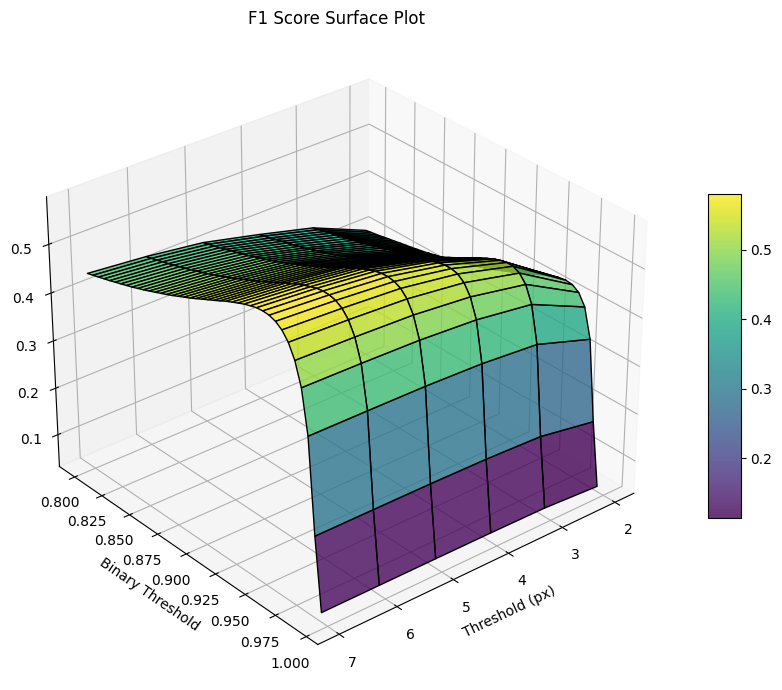

In [3]:
# MODELLO BCE+SmoothL1

from AttentionUnet import inference_F1map_unet

datapath = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/UNet/416px'
output_path = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/output'
model_path = '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/lossBCEL1/best_unet5.pth'

f1_matrix = inference_F1map_unet(
    dataset_path=datapath,
    model_path=model_path,
    img_size=416,
    pixel_thresholds=[2,3,4,5,6,7],
    binary_thresholds=np.arange(0.80, 0.996, 0.005),
    beta=1
)

In [4]:
# da f1 matrix estrapola valore max di binary threshold @4px
import pandas as pd

f1_matrix = pd.read_csv(
    '/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/beta=1/F1_matrix_unet.csv',
    header=None
).values

thresholds = np.loadtxt('/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/beta=1/F1_axis_pixel_thresholds.csv', delimiter=',')
binary = np.loadtxt('/user/gr1/delphi/dghezzi/UNet/SharedDataset/416px/beta=1/F1_axis_binary_thresholds.csv', delimiter=',')

idx = np.where(thresholds == 4)[0][0]
f1_at_threshold = f1_matrix[:, idx]
max_binary = binary[np.argmax(f1_at_threshold)]

print(f'best binary threshold @4px is {max_binary}')
print(f1_at_threshold[np.argmax(f1_at_threshold)])

best binary threshold @4px is 0.955
0.5409


In [5]:
stats = inference_dataset(
    datapath=datapath,
    model_path=model_path,
    output_path=output_path,
    threshold=binary[np.argmax(f1_at_threshold)],
    pixel_thresholds=[4]
)